In [152]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline  

In [153]:
#Problem 1 & 2

def open_file(infile):
    '''open the file and return the data as a large string'''
    
    infile_open = open(infile, 'r') #open file
    
    #read through the header
    i = 0
    while i < 7:
        infile_open.readline()
        i += 1

    infile_data = infile_open.read() #read the data
    infile_open.close() # close the file
    
    #return the data string
    return infile_data


def do_splits(string_data):
    '''split the data off into a numpy array'''
    
    first_split = string_data.split('\n') #split off into rows
    
    #split off into columns
    second_split = []
    N = len(first_split)
    i = 0
    while i < (N - 1):
        second_split.append(first_split[i].split('\t'))
        i += 1
        
    #return the data as a float
    final = []
    i = 0
    while i < (N - 1):
        temp = [float(second_split[i][0]), float(second_split[i][1]), float(second_split[i][2])]
        final.append(temp)
        i += 1
        
    return final
        

def plot(data):
    '''plot the datapoints'''
    
    #plot the data
    fig, ax = plt.subplots(figsize=(8,5))
    
    N = len(data)
    i = 0
    while i < N:
        plt.errorbar(data[i][2], data[i][0], yerr = data[i][1], fmt = 'o', color= 'b', markersize = 4)
        i += 1
        
    #label axis
    ax.set_xlabel("velocity [km/s]", fontsize=12)
    ax.set_ylabel("distance [Mpc]", fontsize=12)
    ax.set_title("Demonstration of Hubble's Law Using Type Ia Supernovae")
    plt.grid()
    plt.show()

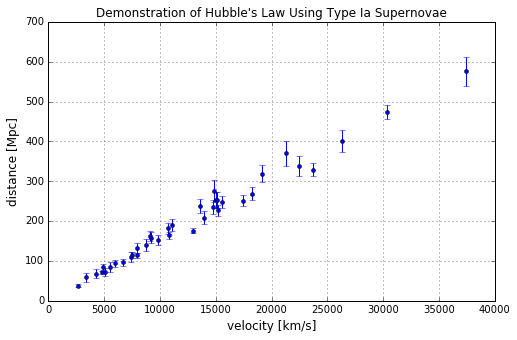

In [154]:
def main1(infile):
    '''solve problem one which is to switch axis'''
    
    filedata = open_file(infile)
    data = do_splits(filedata)
    plot(data)
    
main1('/users/scienceresearch/desktop/astrostats/data.dat')

In [155]:
#Problem 3

def use_polyfit(data):
    '''fit a polynomial to the dataset'''
    
    #get the data into a usable form
    N = len(data)
    i = 0
    xdata = []
    ydata = []
    while i < N:
        xdata.append(data[i][2])
        ydata.append(data[i][0])
        i += 1
        
    #run polyfit
    coefficients = np.polyfit(xdata, ydata, 1)
    return coefficients


def fit_y(data, coefficients):
    '''get the fit and return the y data'''
    
    #get the x data into a usable form
    N = len(data)
    i = 0
    xdata = []
    ydata = []
    while i < N:
        xdata.append(data[i][2])
        i += 1 
    
    #get the x data into a usable form
    N = len(data)
    i = 0
    ydata = []
    while i < N:
        val = (coefficients[0] * xdata[i]) + coefficients[1]
        ydata.append(val)
        i += 1
    
    return [xdata, ydata]


def plot_trendline(data, fit):
    '''plot the datapoints'''
    
    #plot the data
    fig, ax = plt.subplots(figsize=(8,5))
    
    N = len(data)
    i = 0
    while i < N:
        plt.errorbar(data[i][2], data[i][0], yerr = data[i][1], fmt = 'o', color= 'b', markersize = 4)
        i += 1
    
    #plot the trendline
    plt.plot(fit[0], fit[1])
    #label axis
    ax.set_xlabel("velocity [km/s]", fontsize=12)
    ax.set_ylabel("distance [Mpc]", fontsize=12)
    ax.set_title("Demonstration of Hubble's Law Using Type Ia Supernovae")
    plt.grid()
    plt.show()

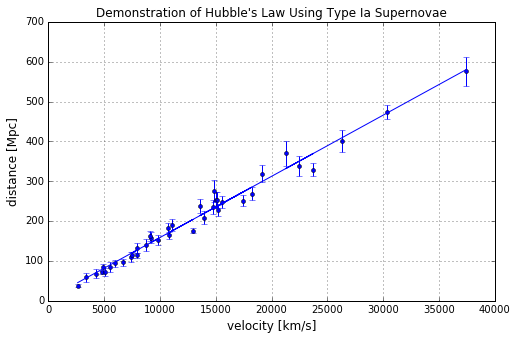

In [156]:
def main3(infile):
    '''do the tasks for problem 3'''
    
    filedata = open_file(infile)
    data = do_splits(filedata)
    fit_coefficients = use_polyfit(data)
    fit = fit_y(data, fit_coefficients)
    plot_trendline(data, fit)
    
main3('/users/scienceresearch/desktop/astrostats/data.dat')

In [157]:
def calc_residuals(fit, data):
    '''find the difference between predicted and actual values'''
    
    #calculate the residuals for each
    N = len(data)
    i = 0
    residuals = []
    while i < N:
        difference = fit[i] - data[i][0]
        residuals.append(difference)
        i += 1
     
    #return the residuals
    return residuals


def plot_residuals(vals):
    '''plot the residuals'''
    
    #make plots
    fig, ax = plt.subplots(figsize=(8,5))
    plt.hist(vals)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Residuals')
    ax.set_title('Trendline Errors')

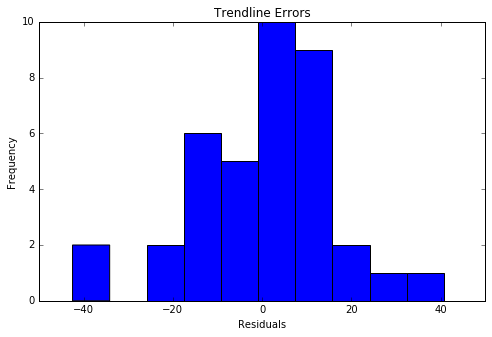

In [158]:
def main3b(infile):
    '''do the tasks for problem 3'''
    
    filedata = open_file(infile)
    data = do_splits(filedata)
    fit_coefficients = use_polyfit(data)
    fit = fit_y(data, fit_coefficients)
    residuals = calc_residuals(fit[1], data)
    plot_residuals(residuals)
    
    
main3b('/users/scienceresearch/desktop/astrostats/data.dat')